In [ ]:
import librosa
import numpy as np
import os
import pandas as pd
from collections import Counter
import matplotlib
%matplotlib inline 
from matplotlib import pyplot as plt

from librosa.display import specshow

In [ ]:
n_fft = 256
hop_length = 32
os.path.expanduser('~/Desktop/nyu/wav/52774ca0-bfde-42e8-ad26-d46d734d4035.wav')
sound_path='/Users/phinchosherpa/Desktop/nyu/wav/52774ca0-bfde-42e8-ad26-d46d734d4035.wav'
# TODO: load BirdVox-DCASE-20k file. Call it "y"
file_name = sound_path
y, sr = librosa.load(file_name)

stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)

spectrogram = librosa.amplitude_to_db(np.abs(stft))

In [ ]:
plt.figure(figsize=(12, 5))
specshow(spectrogram)

In [ ]:
fft_frequencies = librosa.fft_frequencies(sr=sr, n_fft=n_fft)
fmin = 1000 # in Hertz
fmax = 10000 # in Hertz

bin_start = np.where(fft_frequencies>fmin)[0][0]
bin_stop = np.where(fft_frequencies<fmax)[0][-1]

cropped_spectrogram = spectrogram[bin_start:bin_stop, :]
plt.figure(figsize=(12, 5))
specshow(cropped_spectrogram)

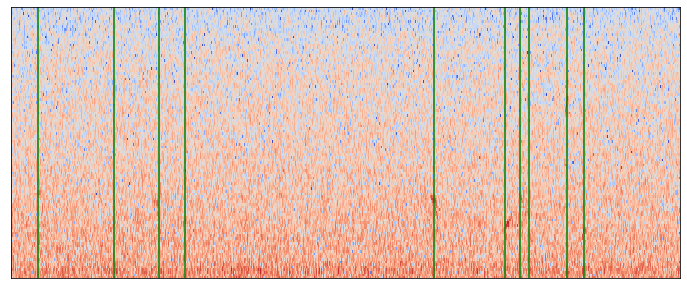

In [121]:
n_required_calls = 10


os.path.expanduser('~/Users/phinchosherpa/Desktop/nyu/BirdVox-DCASE-20k_csv-private.csv')
csv_path='/Users/phinchosherpa/Desktop/nyu/BirdVox-DCASE-20k_csv-private.csv'

wav_dir = '/Users/phinchosherpa/Desktop/nyu/wav/'
df = pd.read_csv(csv_path)
row = df[df["#Calls"]==n_required_calls].iloc[0]
timestamps_str = row["Call timestamps (s)"][1:-1]
timestamps = [float(x[1:-1]) for x in timestamps_str.split(", ")]
timestamp_cols = librosa.time_frequency.time_to_frames(
    timestamps, sr=sr, hop_length=hop_length, n_fft=n_fft)

uuid = row["UUID"]
wav_path = wav_dir + uuid + '.wav'

y, sr = librosa.load(wav_path)

stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)

spectrogram = librosa.amplitude_to_db(np.abs(stft))

fft_frequencies = librosa.fft_frequencies(sr=sr, n_fft=n_fft)
fmin = 1000 # in Hertz
fmax = 10000 # in Hertz

bin_start = np.where(fft_frequencies>fmin)[0][0]
bin_stop = np.where(fft_frequencies<fmax)[0][-1]

cropped_spectrogram = spectrogram[bin_start:bin_stop, :]
plt.figure(figsize=(12, 5))
for col in timestamp_cols:
    plt.plot([col, col], [0, bin_stop-bin_start], color='green')
specshow(cropped_spectrogram)